In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [4]:
data = pd.read_csv('../Downloads//diabetes.csv')  #import dataset
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


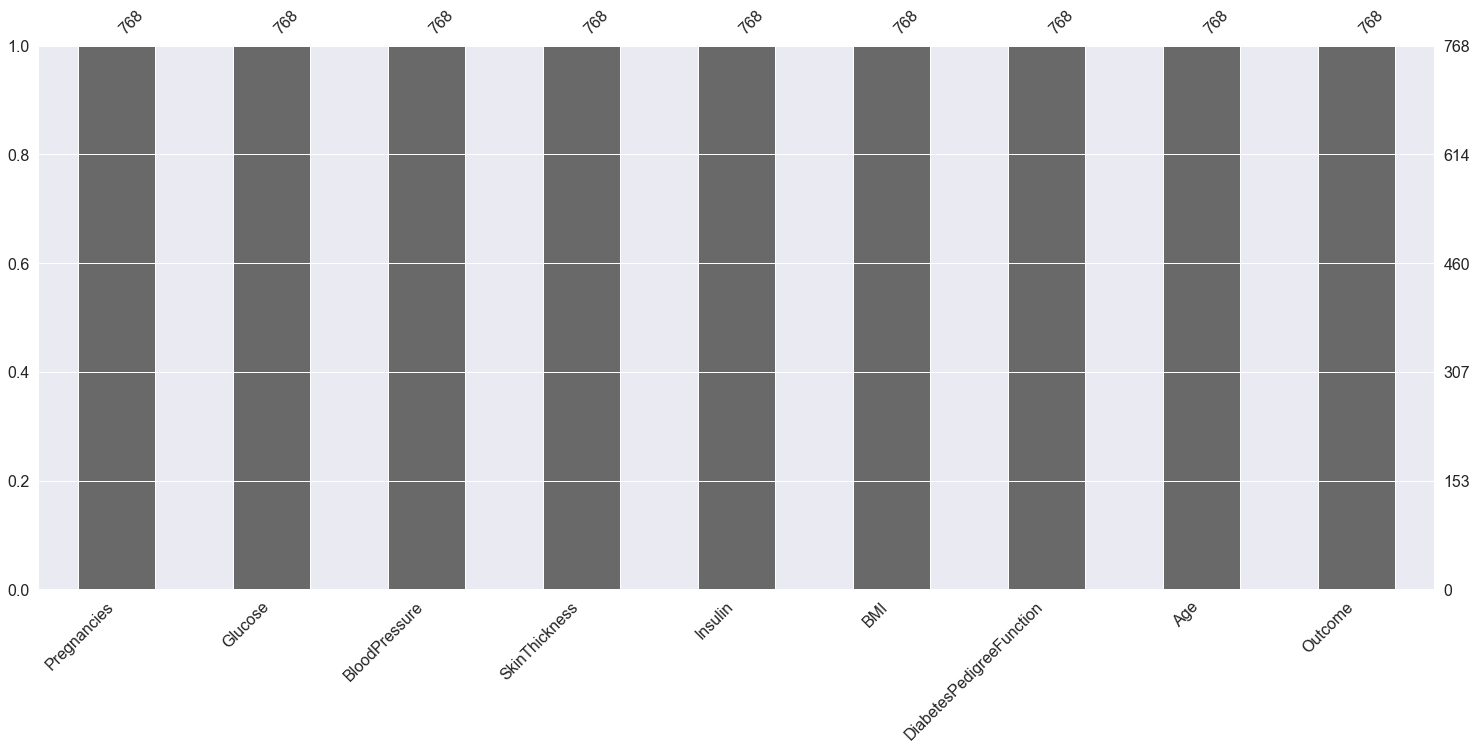

In [5]:
import missingno as msno
msno.bar(data)
plt.show()

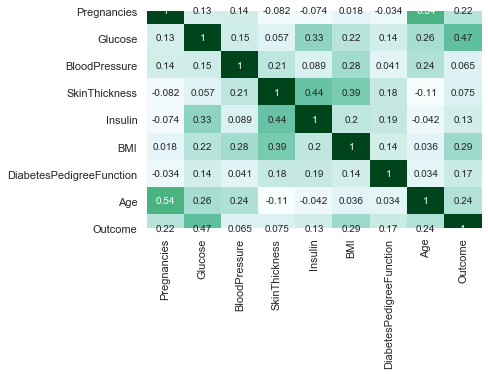

In [6]:
sns.heatmap(data.corr(),cbar=False,cmap='BuGn',annot=True)

In [7]:
col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']

In [8]:
for i in col:
  data[i].replace(0,data[i].mean(),inplace=True)

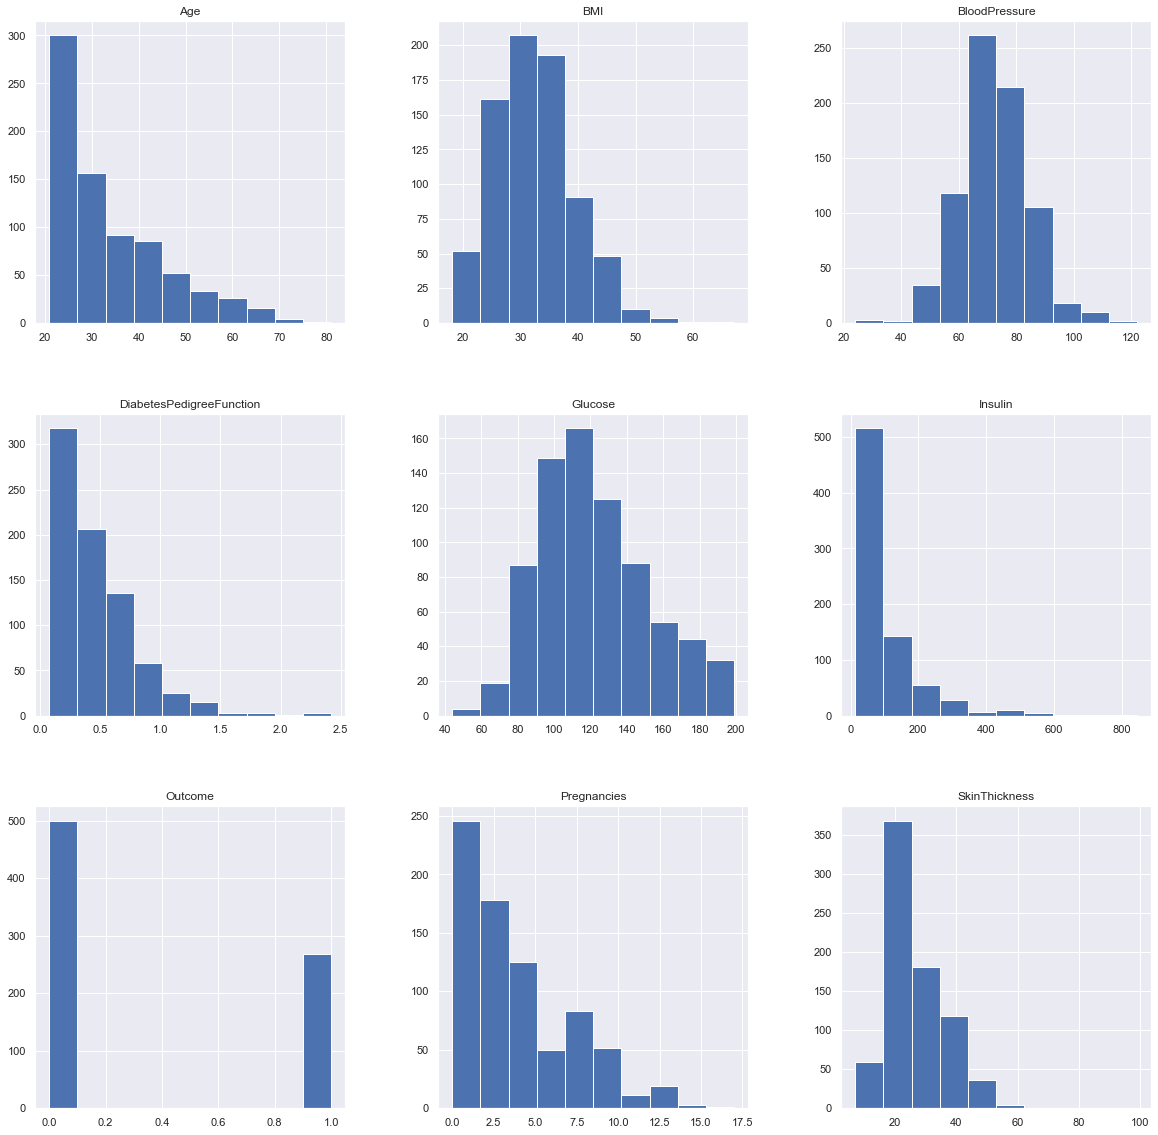

In [9]:
p=data.hist(figsize = (20,20))

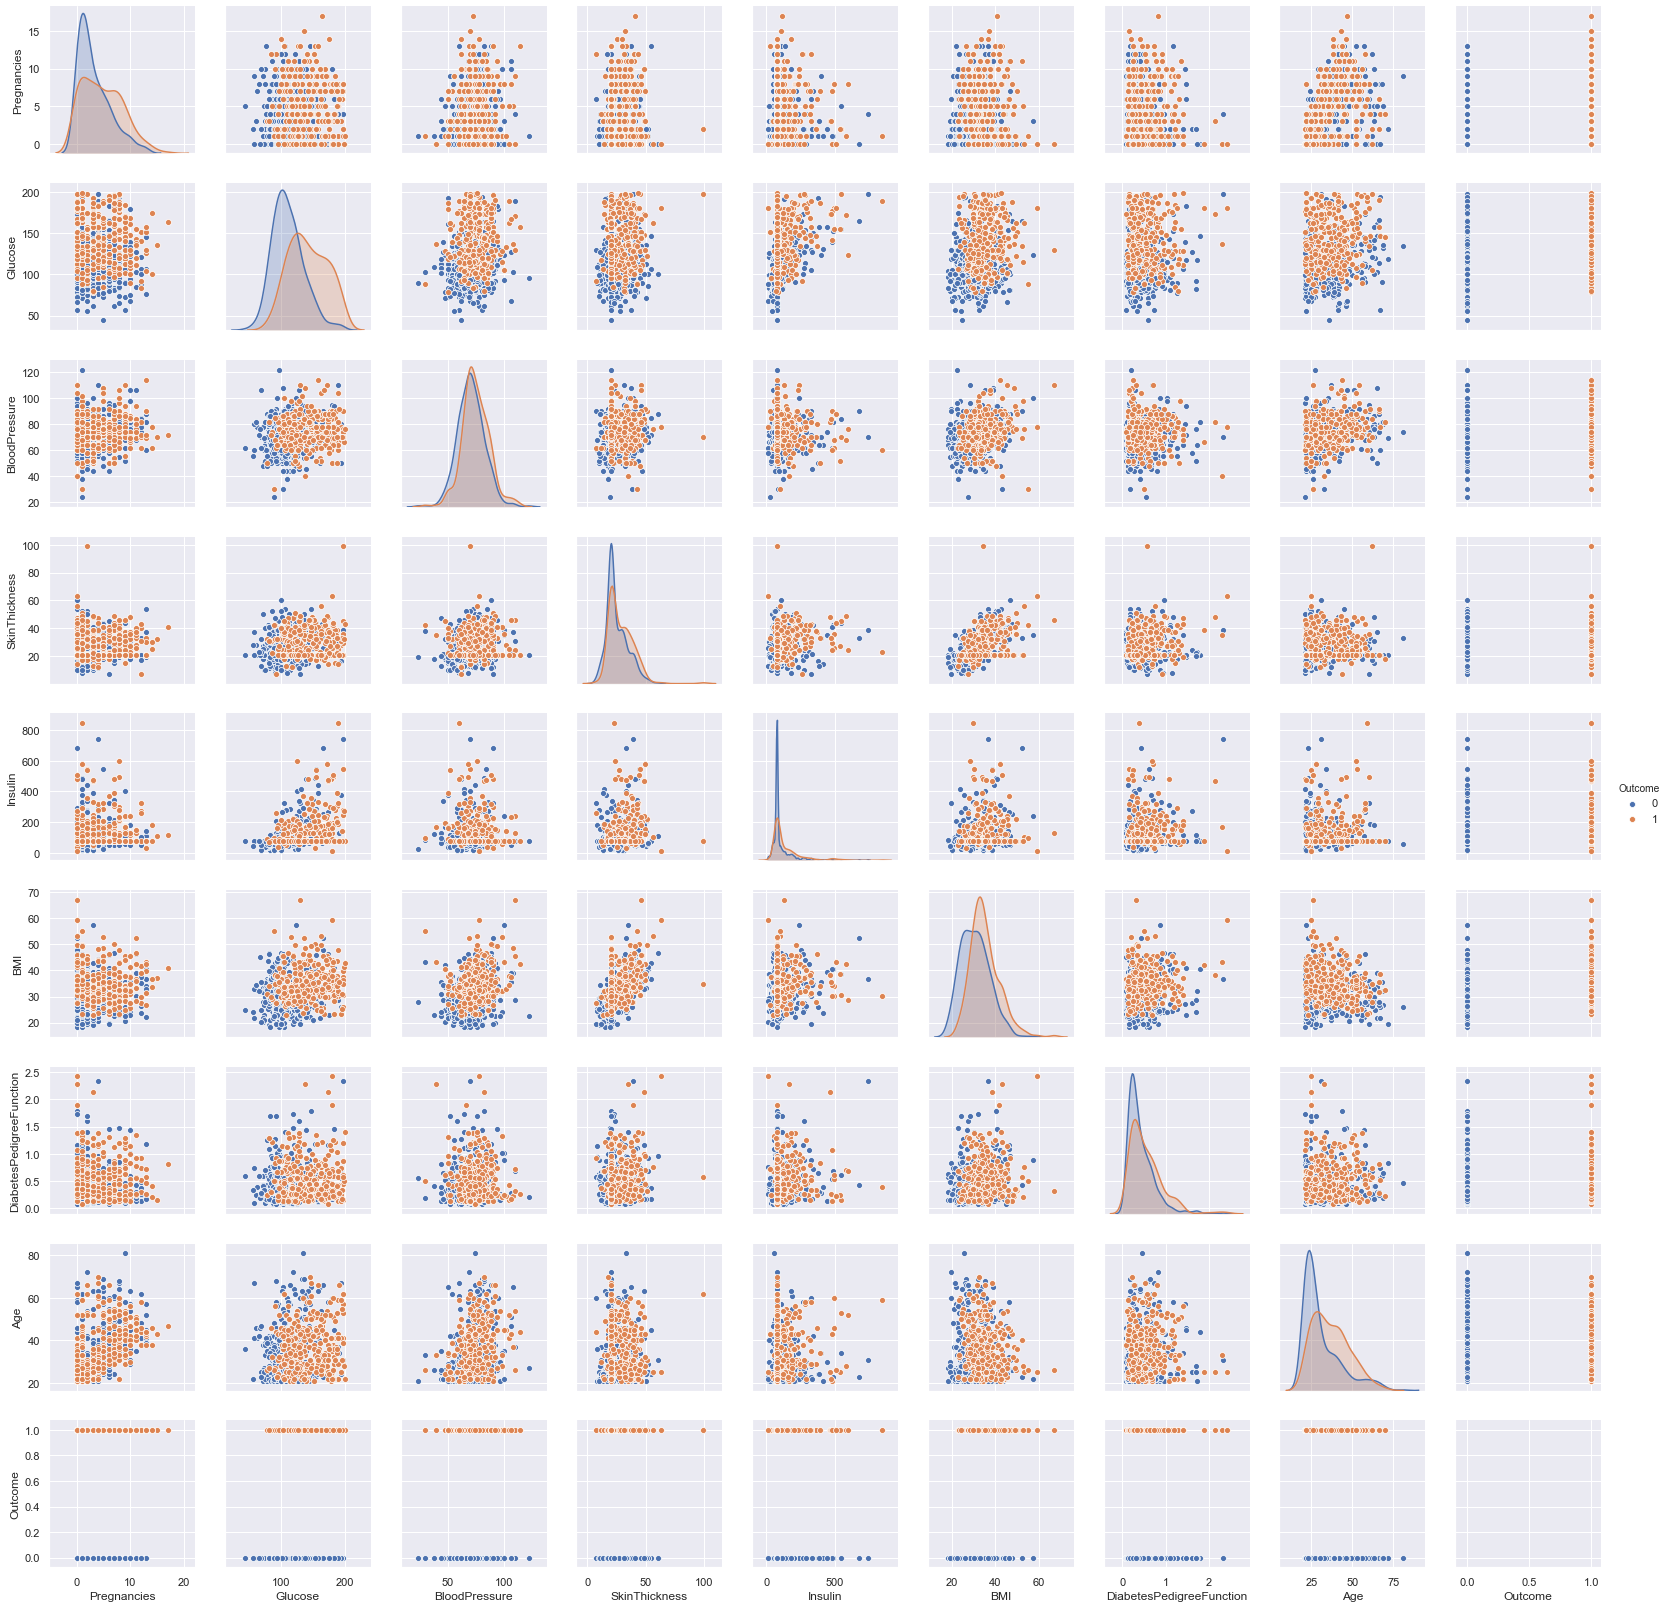

In [10]:
sns.pairplot(data,hue='Outcome')

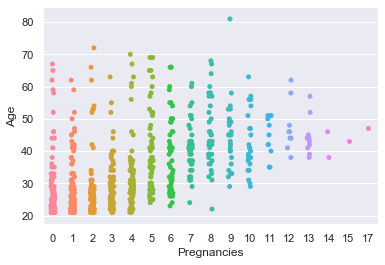

In [11]:
sns.stripplot(x='Pregnancies',y='Age',data=data)

In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y=data.Outcome

In [15]:
#splitting the dataset
from sklearn.model_selection import train_test_split        
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.30,random_state=3)

In [16]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1,penalty='l2')
log_reg.fit(X_train,Y_train)

log_acc=accuracy_score(Y_test,log_reg.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,log_reg.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,log_reg.predict(X_test))*100))

Train Set Accuracy:78.77094972067039
Test Set Accuracy:74.45887445887446


In [17]:
# KNearestNeighbors

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)                #knn classifier
knn.fit(X_train,Y_train)

knn_acc = accuracy_score(Y_test,knn.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,knn.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,knn.predict(X_test))*100))

Train Set Accuracy:82.12290502793296
Test Set Accuracy:71.42857142857143


In [19]:
# SVC

from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,Y_train)    

svm_acc= accuracy_score(Y_test,svm.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,svm.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,svm.predict(X_test))*100))

Train Set Accuracy:84.91620111731844
Test Set Accuracy:73.59307359307358


In [20]:
# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(X_train, Y_train)


dtc_acc= accuracy_score(Y_test,dtc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,dtc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,dtc.predict(X_test))*100))

Train Set Accuracy:83.42644320297951
Test Set Accuracy:71.86147186147186


In [18]:
# GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)


gbc_acc=accuracy_score(Y_test,gbc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,gbc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,gbc.predict(X_test))*100))

Train Set Accuracy:94.22718808193669
Test Set Accuracy:73.59307359307358


In [21]:
# XGBClassifier

from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth=6,n_estimators = 10)
xgb.fit(X_train,Y_train)

xgb_acc= accuracy_score(Y_test,xgb.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,xgb.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,xgb.predict(X_test))*100))

Train Set Accuracy:90.5027932960894
Test Set Accuracy:73.16017316017316


In [22]:
#Stacking

#Stacking is the ensemble technique.In this,two or more classifiers act 
#as base model and the prediction of those will be the x value for the other model(i.e meta-data)

from sklearn.model_selection import train_test_split                #splitting the dataset
                                                                 
train,val_train,test,val_test = train_test_split(X,y,test_size=.50,random_state=3)
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=.20,random_state=3)


In [23]:
#first model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
# second model
svm = SVC()
svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [25]:
pred_1=knn.predict(val_train)
pred_2=svm.predict(val_train)

# addition of 2 predictions
result = np.column_stack((pred_1,pred_2))

In [26]:
pred_test1=knn.predict(x_test)
pred_test2=svm.predict(x_test)


predict_test=np.column_stack((pred_test1,pred_test2))

In [27]:
# stacking classifier
#RandomForestClasifier:- In this prediction of other 2 classification is taken as x value
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier()
rand_clf.fit(result,val_test) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
rand_clf.score(result,val_test)

0.7317708333333334

In [29]:
rand_acc = accuracy_score(y_test ,rand_clf.predict(predict_test))
rand_acc

0.7922077922077922

In [30]:
models = pd.DataFrame({
    'Model': ['Logistic','KNN', 'SVC',  'Decision Tree Classifier',
             'Gradient Boosting Classifier',  'XgBoost','Stacking'],
    'Score': [ log_acc,knn_acc, svm_acc, dtc_acc, gbc_acc, xgb_acc,rand_acc,]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,Stacking,0.792208
0,Logistic,0.744589
2,SVC,0.735931
4,Gradient Boosting Classifier,0.735931
5,XgBoost,0.731602
3,Decision Tree Classifier,0.718615
1,KNN,0.714286


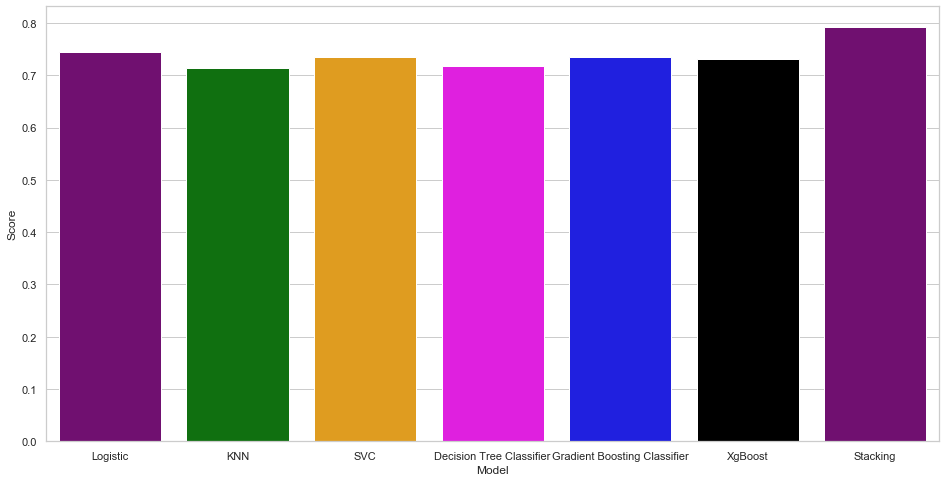

In [31]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()